## Working with DuckDB

In [94]:
import duckdb
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
con = duckdb.connect('travel_insurance.db')

In [4]:
con.sql("SHOW ALL TABLES")

┌──────────────────┬─────────┬───────────────────────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [4]:
employee_df = con.execute("SELECT * FROM dim_employee").fetchdf()
employee_df

,agent_id,agent_name,date_of_joining,street_name,apartment_name,city,state,postal_code,employee_routing_number,employee_account_number,employee_id
0,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,None,Waterbury Center,VT,5677,34584958,HKUN51252328472585,1
1,AGENT00002,Angelo Borjon,2005-12-27,414 Tanya Pass,None,Panama City,FL,32404,107363763,OPIS19290040088204,2
2,AGENT00003,Candy Spellman,2003-09-02,606 National Street,#306,Fayetteville,AR,72701,81744097,YSCJ67489688482590,3
3,AGENT00004,Mary Smith,2004-09-23,235 Hugh Thomas Drive,None,Panama City,FL,32404,67563771,ZANG21285355574581,4
4,AGENT00005,Mildred Diaz,2011-06-21,3426 Broadview Street,None,Montgomery,AL,36110,114951317,DZFS82244494451134,5
...,...,...,...,...,...,...,...,...,...,...,...
1195,AGENT01196,Myrtle Mccatty,2005-09-14,3553 Brandywine Street Northwest,None,Washington,DC,20008,32137938,EWBR19907574832501,1196
1196,AGENT01197,John Dorsey,1993-12-04,2315 Chestnut Street,None,Montgomery,AL,36107,70796687,KGEJ74846009867837,1197
1197,AGENT01198,Ruth Bigbee,1993-09-05,1983 Reidsville Street,None,Annapolis,MD,21401,124993912,RASV88064214164820,1198
1198,AGENT01199,Tommie Camacho,2004-10-25,5821 Taft Street,None,Arvada,CO,80004,19424059,UOFO11656245339211,1199


In [5]:
vendor_df = con.execute("SELECT * FROM dim_vendor").fetchdf()
vendor_df

,vendor_id,vendor_name,street_name,apartment_name,city,state,postal_code,id
0,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703,1
1,VNDR00002,Garcia Ltd,5701 East Shirley Lane,None,Montgomery,AL,36117,2
2,VNDR00003,Cherry LLC,1217 Cottondale Road,None,Montgomery,AL,36109,3
3,VNDR00004,Mays-Benson,227 West Montgomery Cross Road,#736,Savannah,GA,31406,4
4,VNDR00005,Wilson PLC,23 North Hill Street,None,Nashville,TN,37210,5
...,...,...,...,...,...,...,...,...
595,VNDR00596,Rhodes-Mendez,1689 Fisher Pond Road,None,Saint Albans City,VT,5478,596
596,VNDR00597,Ortiz-Donovan,140 South Hill Avenue,#305,Fayetteville,AR,72701,597
597,VNDR00598,"Newton, Hodges and Henry",32512 Christine Drive,None,Union City,CA,94587,598
598,VNDR00599,Reeves-Leonard,12420 West Montebello Avenue,None,Litchfield Park,AZ,85340,599


In [6]:
df = con.sql("Select * from dim_claim_details")
df = df.fetchdf()
df

,transaction_time,transaction_id,customer_id,policy_number,policy_effective_date,loss_date,reporting_date,insurance_type,premium_amount,claim_amount,...,incident_severity,authority_contacted,any_injury,police_report_available,incident_state,incident_city,incident_hour,agent_id,vendor_id,claim_details_id
0,2020-06-01,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556,1
1,2020-06-01,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592,2
2,2020-06-01,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031,3
3,2020-06-01,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075,4
4,2020-06-01,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2021-06-30,TXN00009996,A00006029,PLC00007245,2014-04-11,2021-06-25,2021-06-26,Motor,105.75,1000,...,Minor Loss,Ambulance,1,1,CT,Manchester,0,AGENT00779,None,9996
9996,2021-06-30,TXN00009997,A00003555,PLC00002590,2015-08-25,2021-06-12,2021-06-17,Life,64.59,67000,...,Total Loss,Police,1,0,MA,Worcester,6,AGENT00254,VNDR00598,9997
9997,2021-06-30,TXN00009998,A00004230,PLC00006613,2018-10-11,2021-06-18,2021-06-23,Health,183.50,8000,...,Major Loss,None,1,1,OK,Oklahoma City,12,AGENT00786,VNDR00104,9998
9998,2021-06-30,TXN00009999,A00006694,PLC00001781,2016-01-29,2021-06-16,2021-06-21,Motor,113.46,2000,...,Total Loss,Ambulance,0,1,AR,Fayetteville,6,AGENT00927,VNDR00185,9999


In [7]:
topclaims = con.sql("select insurance_type, count(claim_amount) as total_number_of_claims from dim_claim_details group by insurance_type order by count(claim_amount) desc")
topclaims

┌────────────────┬────────────────────────┐
│ insurance_type │ total_number_of_claims │
│    varchar     │         int64          │
├────────────────┼────────────────────────┤
│ Property       │                   1692 │
│ Mobile         │                   1692 │
│ Health         │                   1690 │
│ Life           │                   1682 │
│ Travel         │                   1670 │
│ Motor          │                   1574 │
└────────────────┴────────────────────────┘

In [8]:
topriskbystate = con.sql("select state ,count(claim_amount) as total_number_of_claims from dim_claim_details where risk_segmentation == 'H' group by state order by count(claim_amount) desc")
topriskbystate

┌─────────┬────────────────────────┐
│  state  │ total_number_of_claims │
│ varchar │         int64          │
├─────────┼────────────────────────┤
│ CA      │                    148 │
│ AZ      │                    105 │
│ FL      │                    104 │
│ TN      │                    100 │
│ AR      │                     97 │
│ CO      │                     95 │
│ CT      │                     92 │
│ DC      │                     92 │
│ GA      │                     88 │
│ AL      │                     86 │
│ VT      │                     83 │
│ MA      │                     81 │
│ KY      │                     76 │
│ MD      │                     76 │
│ OK      │                     66 │
│ AK      │                     66 │
├─────────┴────────────────────────┤
│ 16 rows                2 columns │
└──────────────────────────────────┘

In [9]:
policereport = con.sql("select distinct agent_id, vendor_id, insurance_type, count(claim_amount) from dim_claim_details where police_report_available = '0' and authority_contacted NOT IN ('Police') group by (claim_amount,agent_id,vendor_id,insurance_type) order by count(claim_amount) desc")
policereport

┌────────────┬───────────┬────────────────┬─────────────────────┐
│  agent_id  │ vendor_id │ insurance_type │ count(claim_amount) │
│  varchar   │  varchar  │    varchar     │        int64        │
├────────────┼───────────┼────────────────┼─────────────────────┤
│ AGENT00192 │ NULL      │ Travel         │                   2 │
│ AGENT00680 │ NULL      │ Travel         │                   1 │
│ AGENT00265 │ VNDR00360 │ Property       │                   1 │
│ AGENT00837 │ VNDR00247 │ Health         │                   1 │
│ AGENT00370 │ NULL      │ Property       │                   1 │
│ AGENT00796 │ VNDR00297 │ Health         │                   1 │
│ AGENT01032 │ VNDR00238 │ Life           │                   1 │
│ AGENT00075 │ NULL      │ Motor          │                   1 │
│ AGENT00275 │ VNDR00461 │ Mobile         │                   1 │
│ AGENT00842 │ NULL      │ Property       │                   1 │
│     ·      │  ·        │  ·             │                   · │
│     ·   

In [15]:
tempdf = df.groupby(['agent_id','claim_amount'])['insurance_type'].count().reset_index().sort_values('claim_amount',ascending=False)
tempdf

,agent_id,claim_amount,insurance_type
422,AGENT00056,100000,1
4399,AGENT00583,100000,1
642,AGENT00083,100000,1
3393,AGENT00446,100000,1
3033,AGENT00399,100000,1
...,...,...,...
2323,AGENT00308,100,1
2376,AGENT00314,100,1
2411,AGENT00319,100,1
2474,AGENT00326,100,1


In [11]:
tempdf2 = tempdf[tempdf['insurance_type'] > 2].sort_values('claim_amount',ascending=False)
tempdf2

,agent_id,claim_amount,insurance_type
5963,AGENT00794,20000,3
5163,AGENT00688,20000,3
6641,AGENT00889,20000,3
5660,AGENT00752,19000,3
8435,AGENT01125,15000,3
...,...,...,...
2847,AGENT00379,300,3
3142,AGENT00414,200,3
5504,AGENT00732,100,3
746,AGENT00100,100,4


In [12]:
frauddf = df[(df['claim_status'] == 'A') & (df['risk_segmentation'] == 'H') & (df['incident_severity'] == 'Major Loss')]
frauddf = [frauddf['claim_amount'] >= 15000]
frauddf

[8       False
 75       True
 76       True
 92      False
 99      False
         ...  
 9826    False
 9838    False
 9855    False
 9948     True
 9958    False
 Name: claim_amount, Length: 439, dtype: bool]

In [103]:
insurance_df = con.execute("SELECT premium_amount, claim_amount FROM dim_claim_details where premium_amount < 100 and claim_amount > 50000").fetchdf()
insurance_df

,premium_amount,claim_amount
0,87.02,63000
1,61.45,92000
2,64.16,51000
3,77.17,68000
4,81.45,80000
...,...,...
896,97.90,67000
897,97.20,93000
898,78.10,65000
899,91.53,78000


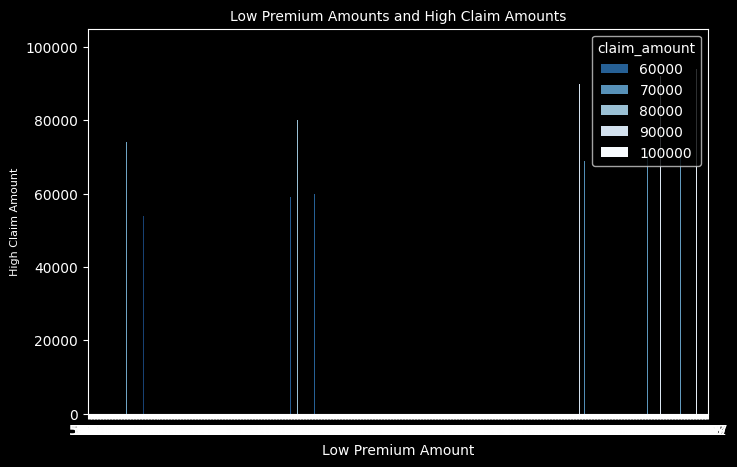

In [105]:
plt.figure(figsize=(8, 5))
sns.barplot(x='premium_amount', y='claim_amount', data=insurance_df, palette='Blues_r', hue='claim_amount')
plt.title('Low Premium Amounts and High Claim Amounts', fontsize=10)
plt.xlabel('Low Premium Amount', fontsize=10)
plt.ylabel('High Claim Amount', fontsize=8)
plt.show()

In [80]:
agentfraud_df = con.sql("SELECT agent_id,count(claim_amount) as count_of_claims, min(reporting_date), max(reporting_date),  DATEDIFF('Day',min(reporting_date),max(reporting_date)) as days_between_all_claims from dim_claim_details group by agent_id having count(claim_amount) > 15 and DATEDIFF('Day',max(reporting_date),min(reporting_date)) < 30 order by count(claim_amount) desc")
agentfraud_df = agentfraud_df.fetchdf()
agentfraud_df

,agent_id,count_of_claims,min(reporting_date),max(reporting_date),days_between_all_claims
0,AGENT00992,19,2020-06-20,2021-06-20,365
1,AGENT00319,18,2020-05-27,2021-03-23,300
2,AGENT00849,17,2020-07-13,2021-06-14,336
3,AGENT00388,17,2020-06-01,2021-06-09,373
4,AGENT01106,16,2020-06-01,2021-05-24,357
5,AGENT00723,16,2020-06-08,2021-06-07,364
6,AGENT01097,16,2020-06-06,2021-06-18,377


In [58]:
instantclaims_df = con.sql("SELECT agent_id, customer_name, policy_effective_date, reporting_date, DATEDIFF('DAY',policy_effective_date,reporting_date) as days_since_policy_start from dim_claim_details where DATEDIFF('DAY',policy_effective_date,reporting_date) < 200 order by days_since_policy_start desc")  
instantclaims_df = instantclaims_df.fetchdf()
instantclaims_df

,agent_id,customer_name,policy_effective_date,reporting_date,days_since_policy_start
0,AGENT00847,Elda Brundidge,2019-12-13,2020-06-28,198
1,AGENT01159,Joyce Garcia,2019-12-19,2020-07-02,196
2,AGENT00671,Myrtle Orabuena,2020-01-28,2020-08-11,196
3,AGENT00107,Jerome Hall,2019-11-30,2020-06-12,195
4,AGENT00515,John Tilley,2019-11-18,2020-05-30,194
5,AGENT00041,Reginald Guercio,2020-01-13,2020-07-22,191
6,AGENT01001,Thomas Lelacheur,2019-11-26,2020-05-29,185
7,AGENT00714,Damien Holtzman,2019-12-17,2020-06-18,184
8,AGENT01049,Sophia Meier,2019-12-01,2020-06-01,183
9,AGENT00786,David Lewis,2019-12-02,2020-06-01,182


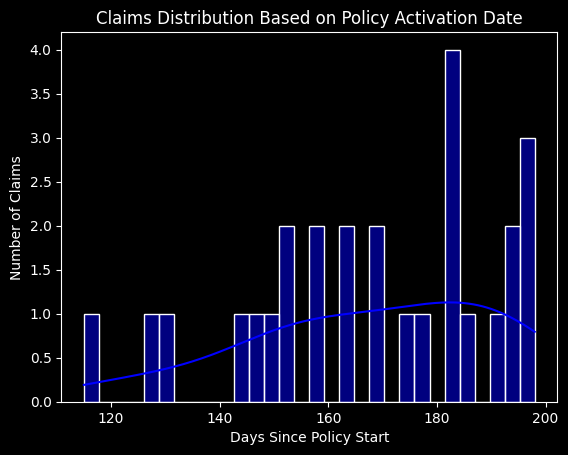

In [59]:
#instantclaims_df['policy_effective_date'] = (pd.to_datetime(instantclaims_df['reporting_date']) - pd.to_datetime(instantclaims_df['policy_effective_date'])).dt.days
sns.histplot(instantclaims_df['days_since_policy_start'], bins=30, kde=True, color='blue')
plt.style.use('dark_background') 
plt.title('Claims Distribution Based on Policy Activation Date')
plt.xlabel('Days Since Policy Start')
plt.ylabel('Number of Claims')
plt.show()


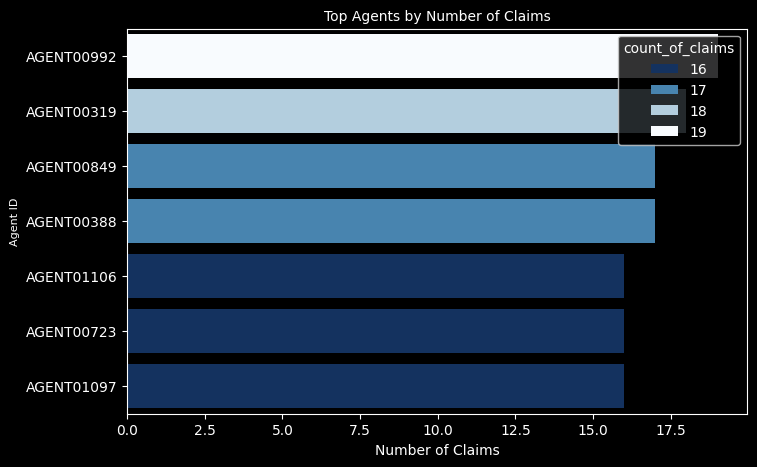

In [88]:
#agent_id	count_of_claims	min(reporting_date)	max(reporting_date)	days_between_all_claim

plt.figure(figsize=(8, 5))
sns.barplot(x='count_of_claims', y='agent_id', data=agentfraud_df, palette='Blues_r', hue='count_of_claims')
plt.title('Top Agents by Number of Claims', fontsize=10)
plt.xlabel('Number of Claims', fontsize=10)
plt.ylabel('Agent ID', fontsize=8)
plt.show()

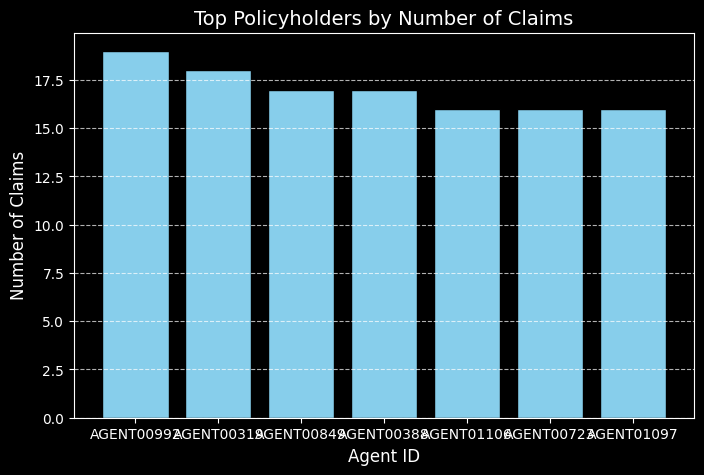

In [93]:
plt.figure(figsize=(8, 5))
plt.bar(agentfraud_df['agent_id'], agentfraud_df['count_of_claims'], color='skyblue', edgecolor='black')
plt.title('Top Policyholders by Number of Claims', fontsize=14)
plt.xlabel('Agent ID', fontsize=12)
plt.ylabel('Number of Claims', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [63]:
topclaims_df = con.sql("SELECT customer_name, transaction_id, count(claim_amount) as count_of_claims from dim_claim_details group by customer_name, transaction_id order by count(claim_amount) desc")
topclaims_df = topclaims_df.fetchdf()
topclaims_df

,customer_name,transaction_id,count_of_claims
0,Nicholas Honokaupu,TXN00000010,1
1,Lisa Rosario,TXN00000013,1
2,Mark Huang,TXN00000018,1
3,David Goodman,TXN00000022,1
4,Barbara Clouthier,TXN00000027,1
...,...,...,...
9995,Steven Austin,TXN00009936,1
9996,Anthony Evey,TXN00009942,1
9997,John Welch,TXN00009987,1
9998,Ronald Davis,TXN00009989,1


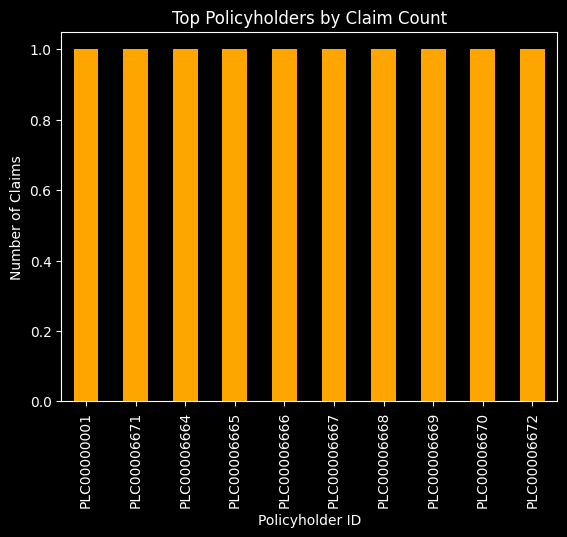

In [ ]:


top_claimants = topclaims_df.groupby('policy_number')['transaction_id'].count().sort_values(ascending=False).head(10)
top_claimants.plot(kind='bar', color='orange')
plt.style.use('dark_background') 
plt.title('Top Policyholders by Claim Count')
plt.xlabel('Policyholder ID')
plt.ylabel('Number of Claims')
plt.show()


<Axes: xlabel='any_injury', ylabel='claim_amount'>

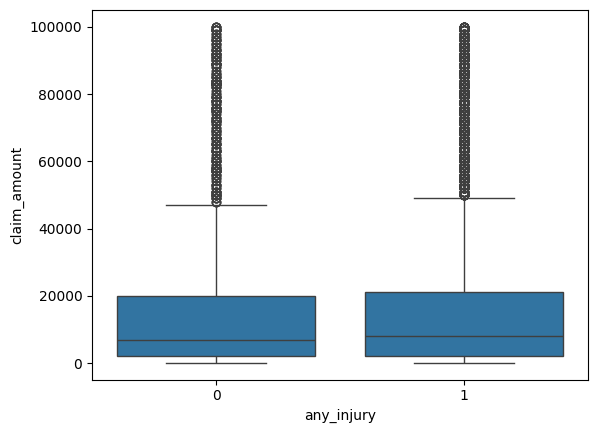

In [13]:
sns.boxplot(x='any_injury', y='claim_amount', data=df)

In [14]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('any_injury', axis=1)
y = df['any_injury']
model = RandomForestClassifier()
model.fit(X, y)


TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
sns.heatmap(df.corr(), annot=True)